In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)
from sklearn.preprocessing import StandardScaler

In [2]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
# check data types of all columns
print(churnData.dtypes)   

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
churnData.columns= churnData.columns.str.lower()

In [5]:
print(churnData.dtypes)

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object


In [6]:
#churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges']) error showing " " inside the column

In [7]:
churnData.isnull().values.any()

False

In [8]:
# get rid of "" 
churnData.totalcharges.where(churnData.totalcharges != " " , 0, inplace=True)

In [9]:
sum(churnData.totalcharges == 0)

11

In [10]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'])

In [11]:
sum(churnData.totalcharges == 0)

11

In [12]:
# calculate and replace with the mean of totalcharges
mean_totalcharges= churnData['totalcharges'].mean()
mean_totalcharges

2279.734303563826

In [13]:
churnData["totalcharges"].replace(0,churnData["totalcharges"].mean(axis=0),inplace=True)

In [14]:
mean_totalcharges

2279.734303563826

<AxesSubplot:xlabel='totalcharges', ylabel='Count'>

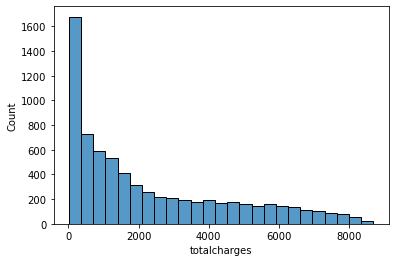

In [15]:
sns.histplot(churnData.totalcharges)

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data


In [16]:
print(churnData.dtypes)

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object


In [17]:
numerical = churnData.select_dtypes(np.number)
numerical

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


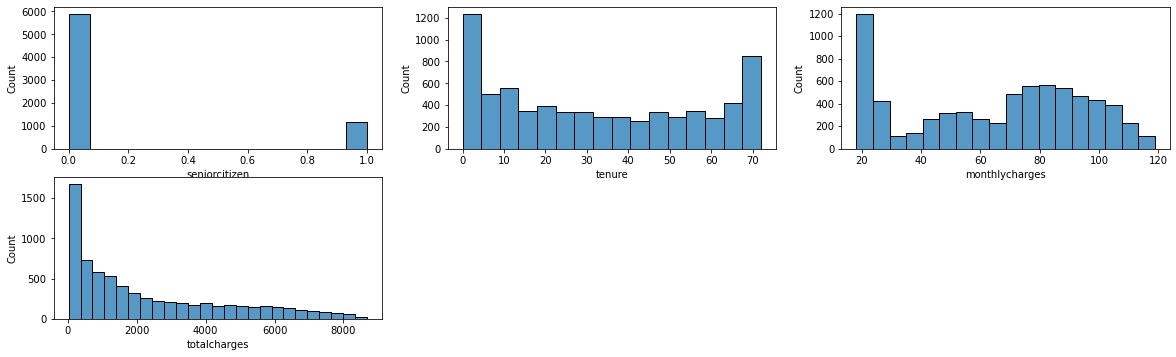

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
for i, column in enumerate(numerical.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(numerical[column])

In [21]:
X = numerical
y = churnData.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=100)

In [24]:
# Remove senior
#X_train_sc = X_train.iloc[:,1:]
#X_test_sc = X_test.iloc[:,1:]


In [25]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.43814715,  0.75442239, -0.14556789,  0.34928174],
       [ 2.28233828, -0.71075117,  1.05179565, -0.3803931 ],
       [-0.43814715,  0.67302386,  1.43766799,  1.32919713],
       ...,
       [-0.43814715,  1.60910697,  0.12768935,  1.13559729],
       [-0.43814715, -1.11774382,  0.5168739 , -0.84101346],
       [-0.43814715, -1.28054089,  0.49865675, -0.97604918]])

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [28]:
X_train_scaled

,seniorcitizen,tenure,monthlycharges,totalcharges
0,-0.438147,0.754422,-0.145568,0.349282
1,2.282338,-0.710751,1.051796,-0.380393
2,-0.438147,0.673024,1.437668,1.329197
3,-0.438147,1.120716,0.006794,0.774861
4,-0.438147,-0.914247,0.298268,-0.704695
...,...,...,...,...
4925,-0.438147,0.510227,-1.279999,-0.473313
4926,-0.438147,-1.199142,-1.457203,-0.988629
4927,-0.438147,1.609107,0.127689,1.135597
4928,-0.438147,-1.117744,0.516874,-0.841013


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.796146,0.781354
1,Precision,0.668552,0.632653
2,Recall,0.453569,0.438163


Confusion matrix for the train set
[[3334  293]
 [ 712  591]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


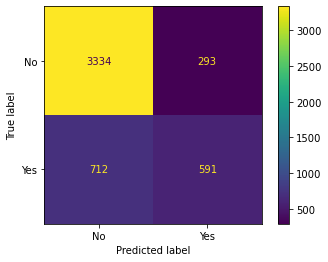



Confusion matrix for the test set
[[1403  144]
 [ 318  248]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


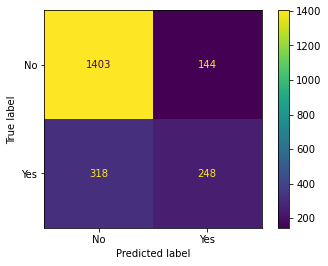

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()